# Assignment 08

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
%config InlineBackend.figure_format = "retina"

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

We know that the number of triangles is given by

$$
    n_\triangle = \frac{1}{6}\text{Tr}\left(A^3\right)
$$

In [3]:
def complete_graph(N):
    A = np.ones((N, N))
    A[np.diag_indices(N)] = 0.0
    return A

In [4]:
print(" N |    ▲   | edges")
for n in range(3, 16):
    A = complete_graph(n) 
    n_triangles = n * (n - 1) * (n - 2) / 2
    n_edges = n * (n - 1) / 2
    print(f"{n:02} | {n_triangles:>6,.0f} | {n_edges:>4.0f}")

 N |    ▲   | edges
03 |      3 |    3
04 |     12 |    6
05 |     30 |   10
06 |     60 |   15
07 |    105 |   21
08 |    168 |   28
09 |    252 |   36
10 |    360 |   45
11 |    495 |   55
12 |    660 |   66
13 |    858 |   78
14 |  1,092 |   91
15 |  1,365 |  105


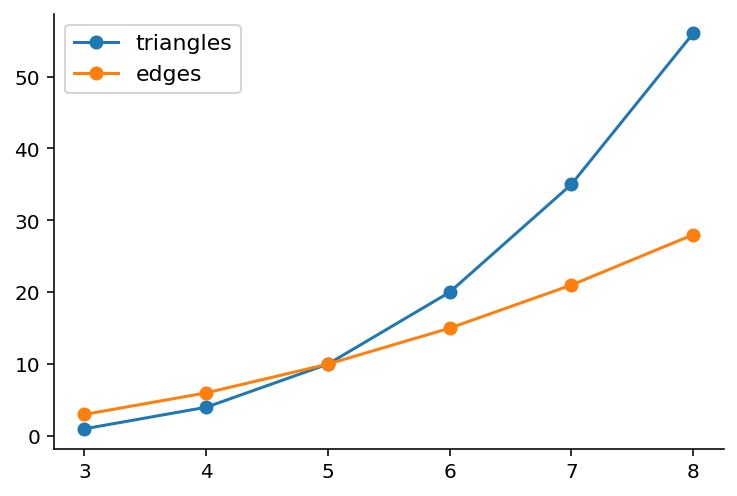

In [5]:
N_vals = np.arange(3, 9)

plt.plot(N_vals, N_vals * (N_vals - 1) * (N_vals - 2) / 6 , marker="o", label="triangles")
plt.plot(N_vals, N_vals * (N_vals - 1) / 2, marker="o", label="edges")
plt.legend(fontsize=11);

### c) Effective size of a node

In [6]:
G = nx.Graph(complete_graph(4))

In [7]:
A = np.array([
    [0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0]
])

G = nx.Graph(A)

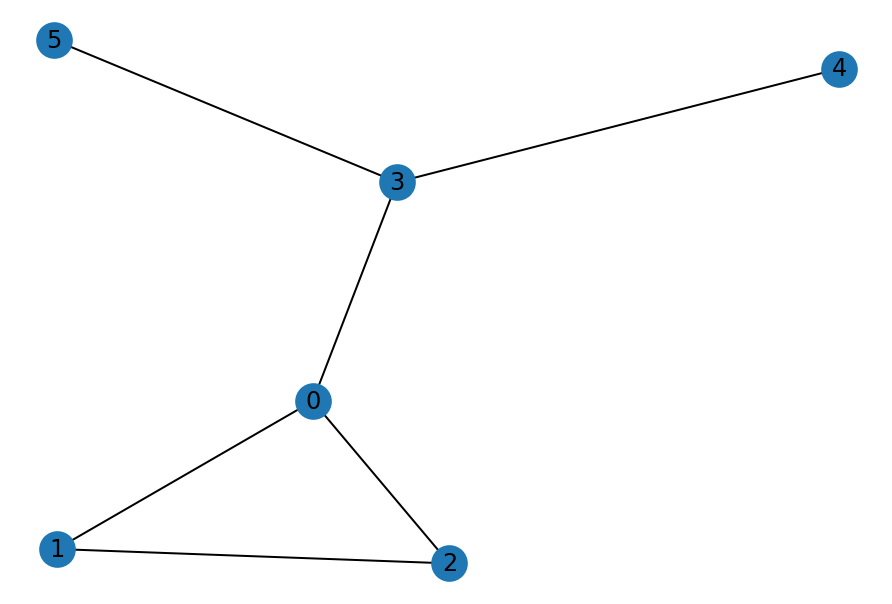

In [8]:
nx.draw(G, with_labels=True)

$$
c_u = \frac{2 T(u)}{\text{deg}(u)(\text{deg}(u)-1)}
$$

In [9]:
# Number of triangles centered at node i
n_triangles = np.einsum("ij,jk,ki->i", A, A, A) // 2
n_triangles

array([1, 1, 1, 0, 0, 0])

In [10]:
# Degree of node i
node_degree = A.sum(axis=1)
node_degree

array([3, 2, 2, 3, 1, 1])

In [11]:
pd.DataFrame({
    "clustering": nx.clustering(G),
    "effective_size": nx.effective_size(G)
})

,clustering,effective_size
0,0.333333,2.333333
1,1.000000,1.000000
2,1.000000,1.000000
3,0.000000,3.000000
4,0.000000,1.000000
5,0.000000,1.000000


In [12]:
node_degree = A.sum(axis=1)
node_degree - (A @ A.T * A).sum(axis=1) / node_degree

array([2.33333333, 1.        , 1.        , 3.        , 1.        ,
       1.        ])

$$
    e(u) = \sum_{v \in N(u) \setminus \{u\}}
   \left(1 - \sum_{w \in N(v)} p_{uw} m_{vw}\right)
 $$

## Models of random graphs with clustering

In [88]:
from itertools import combinations
from scipy.special import comb

In [244]:
def sample_triple(N, c):
    p = c / comb(N - 1, 2)
    nodes = range(1, N + 1)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    
    for n1, n2, n3 in combinations(nodes, 3):
        if p > np.random.rand():
            G.add_edge(n1, n2)
            G.add_edge(n1, n3)
            G.add_edge(n2, n3)
    
    return G

In [295]:
N = 1000
c = 2
G = sample_triple(N, c)
# nx.draw(G, with_labels=True)

In [297]:
2 * c

4

In [298]:
sum(dict(nx.degree(G)).values()) / N

4.052

In [251]:
Ag = nx.adjacency_matrix(G).todense()
np.einsum("ij,jk,ki", Ag, Ag, Ag) / 6

10.0

In [261]:
Ag

matrix([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 1, 1, 1, 0]])

In [257]:
Ag.sum(axis=1)

matrix([[4],
        [4],
        [4],
        [4],
        [4]])

In [258]:
N * (N - 1) / 2

10.0

In [241]:
nx.degree_histogram(G)

[0, 0, 0, 4]

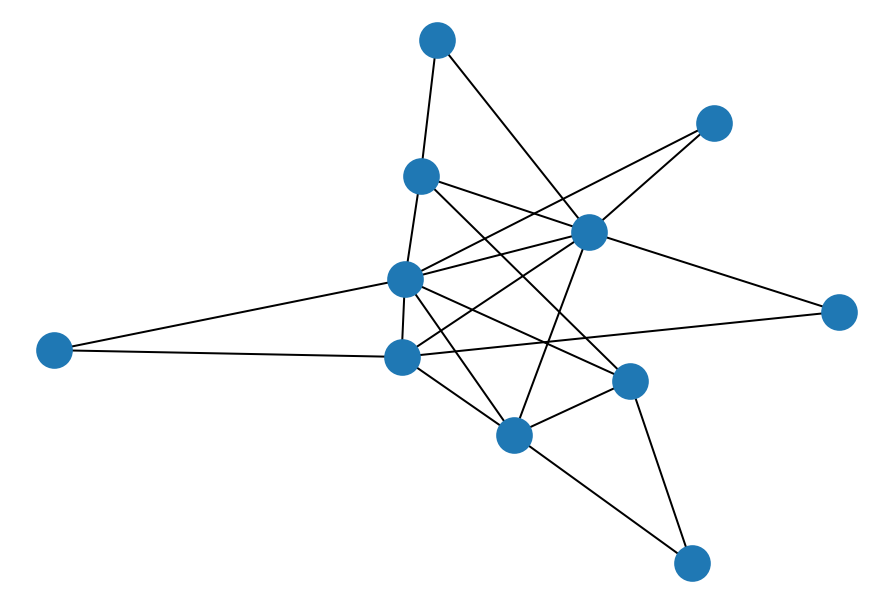

In [176]:
c = 3
N = 11

np.random.seed(314)
G = sample_triple(N, c)
nx.draw(G)

In [217]:
comb(3, 2)

3.0

In [177]:
Ag = nx.linalg.adjacency_matrix(G).todense()
np.einsum("ij,jk,ki->", Ag, Ag, Ag) / 6

12.0

In [210]:
N, c = 50, 4
nsamples = 400
sample_matrix = np.zeros((nsamples, N))

for n in range(nsamples):
    G = sample_triple(N, c)
    mean_degree = list(dict(nx.degree(G)).values())
    sample_matrix[n, :] = mean_degree

In [211]:
sample_matrix.mean(axis=0)

array([7.31  , 7.515 , 7.2975, 7.4925, 7.515 , 7.5825, 7.465 , 7.5825,
       7.3375, 7.475 , 7.235 , 7.7225, 7.155 , 7.3625, 7.4025, 7.2825,
       7.64  , 7.57  , 7.3025, 7.2775, 7.6225, 7.0925, 7.2375, 7.1275,
       7.3075, 7.385 , 7.4225, 7.3675, 7.48  , 7.42  , 7.4   , 7.515 ,
       7.645 , 7.26  , 7.5625, 7.575 , 7.4925, 7.1925, 7.2825, 7.3625,
       7.4575, 7.6225, 7.73  , 7.4225, 7.2525, 7.405 , 7.425 , 7.8   ,
       7.295 , 7.1525])

In [212]:
sample_matrix.mean()

7.4167

In [200]:
2 * c

8